In [ ]:
#He instalado estas dos librerias para usarlas junto con matplotlib y hacer mapas.
#!pip install geopandas
#!pip install geoplot

     |████████████████████████████████| 323 kB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.5 MB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 8.3 MB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 23.9 MB 14.5 MB/s eta 0:00:01
     |████████████████████████████████| 19.5 MB 6.2 MB/s eta 0:00:01�███████████▍       | 14.9 MB 6.2 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 2.0.2 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 2.0.2 which is incompatible.
     |██████████████████████████

In [ ]:
#!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 1.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 1.9 MB/s eta 0:00:0000:0100:01


In [ ]:
#!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 1.9 MB/s eta 0:00:0000:0100:01


In [ ]:
#!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 1.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 1.9 MB/s eta 0:00:00a 0:00:01


In [6]:
#Importaciones
import pandas as pd
import numpy as np
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind 
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency 
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt



In [7]:
pd.set_option('display.max_columns', None)

1.0 EXPLORACIÓN INICIAL

In [8]:
#Importar CSV 1
df1 = pd.read_csv("files/Customer-Flight-Activity.csv", index_col=0)


In [9]:
#Importar CSV 2
df2 = pd.read_csv("files/Customer-Loyalty-History.csv", index_col=0)

1.1 Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

In [10]:
#Ver el head del CSV 1 
df1.head(2)

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100102,2017,1,10,4,14,2030,203.0,0,0


In [11]:
#Ver el head del CSV 2
df2.head(2)

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN


In [12]:
print(f"El número de filas que tenemos es {df1.shape[0]}, y el número de columnas es {df1.shape[1]}")

El número de filas que tenemos es 405624, y el número de columnas es 9


In [13]:
print(f"El número de filas que tenemos es {df2.shape[0]}, y el número de columnas es {df2.shape[1]}")

El número de filas que tenemos es 16737, y el número de columnas es 15


In [14]:
df1.describe()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000
mean,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503
std,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038
min,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000
75%,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000
max,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000


In [15]:
df2.describe(include = "object").T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405624 entries, 100018 to 999986
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Year                         405624 non-null  int64  
 1   Month                        405624 non-null  int64  
 2   Flights Booked               405624 non-null  int64  
 3   Flights with Companions      405624 non-null  int64  
 4   Total Flights                405624 non-null  int64  
 5   Distance                     405624 non-null  int64  
 6   Points Accumulated           405624 non-null  float64
 7   Points Redeemed              405624 non-null  int64  
 8   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 30.9 MB


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16737 entries, 480934 to 652627
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16737 non-null  object 
 1   Province            16737 non-null  object 
 2   City                16737 non-null  object 
 3   Postal Code         16737 non-null  object 
 4   Gender              16737 non-null  object 
 5   Education           16737 non-null  object 
 6   Salary              12499 non-null  float64
 7   Marital Status      16737 non-null  object 
 8   Loyalty Card        16737 non-null  object 
 9   CLV                 16737 non-null  float64
 10  Enrollment Type     16737 non-null  object 
 11  Enrollment Year     16737 non-null  int64  
 12  Enrollment Month    16737 non-null  int64  
 13  Cancellation Year   2067 non-null   float64
 14  Cancellation Month  2067 non-null   float64
dtypes: float64(4), int64(2), object(9)
memory usage: 2.0

1.3 Une los dos conjuntos de datos de la forma más eficiente.

In [18]:
#Unificar los dos CSV 
df_unido = pd.merge(df1, df2, on='Loyalty Number', how='left').reset_index()

In [19]:
df_unido.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [20]:
df_unido["Education"].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [21]:
df_unido["Education"].value_counts()

Education
Bachelor                253752
College                 102672
High School or Below     19008
Doctor                   17856
Master                   12336
Name: count, dtype: int64

In [22]:
df_unido["Year"].unique()

array([2017, 2018])

In [23]:
df_unido["Year"].value_counts()

Year
2017    202812
2018    202812
Name: count, dtype: int64

In [24]:
df_unido["Flights Booked"].unique()

array([ 3, 10,  6,  0,  8, 11,  9,  4,  7,  5,  2,  1, 12, 13, 14, 16, 15,
       17, 18, 19, 20, 21])

In [25]:
df_unido["Flights Booked"].value_counts()

Flights Booked
0     197992
3      18228
11     15705
5      15084
7      14561
8      14357
9      14164
6      13847
2      13641
10     13363
4      12821
1      12667
13     10782
12     10382
14      7057
15      6582
16      4354
17      3899
18      2958
19      1496
20      1156
21       528
Name: count, dtype: int64

In [26]:
df_unido.head(1)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [27]:
df_unido["Flights Booked"].unique()

array([ 3, 10,  6,  0,  8, 11,  9,  4,  7,  5,  2,  1, 12, 13, 14, 16, 15,
       17, 18, 19, 20, 21])

In [28]:
# sacamos las columnas que son de tipo object (categóricas) de nuestro DataFrame usando el método '.select_dtypes()'
df_cat = df_unido.select_dtypes(include = "object")
df_cat.head()

,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,Enrollment Type
0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,Standard
1,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,Standard
2,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,Standard
3,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,Standard
4,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,Divorced,Star,Standard


In [29]:
df_cat.columns

Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Marital Status', 'Loyalty Card', 'Enrollment Type'],
      dtype='object')

In [30]:
# creamos una variable con los nombres de las columnas del DataFrame de las variables categóricas utilizando el método '.columns'
columnas_cat = df_cat.columns
print(f"Las columnas del DataFrame de variables categóricas son {columnas_cat}")

# empezamos a iterar por cada una de las columnas para sacar sus valores únicos y sus frecuencias
for columna in columnas_cat:
    print(f" \n----------- ESTAMOS ANALIZANDO LA COLUMNA: '{columna.upper()}' -----------\n")
    print(f"Sus valores únicos son: {df_cat[columna].unique()}\n")
    print(f"Las frecuencias de los valores únicos de las categorías son: {df_cat[columna].value_counts()} ")
    print(f"Cantidad de valores nulos: {df_cat[columna].isna().sum()}")

Las columnas del DataFrame de variables categóricas son Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Marital Status', 'Loyalty Card', 'Enrollment Type'],
      dtype='object')
 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'COUNTRY' -----------

Sus valores únicos son: ['Canada']

Las frecuencias de los valores únicos de las categorías son: Country
Canada    405624
Name: count, dtype: int64 
Cantidad de valores nulos: 0
 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'PROVINCE' -----------

Sus valores únicos son: ['Alberta' 'Ontario' 'British Columbia' 'Saskatchewan' 'Quebec'
 'Newfoundland' 'Manitoba' 'New Brunswick' 'Nova Scotia'
 'Prince Edward Island' 'Yukon']

Las frecuencias de los valores únicos de las categorías son: Province
Ontario                 130896
British Columbia        106848
Quebec                   79968
Alberta                  23400
Manitoba                 15984
New Brunswick            15432
Nova Scotia              12576
Sask

In [31]:
# Código nos esta diciendo que tenemos filas duplicadas. 1864.
df_unido.duplicated().sum()

np.int64(1864)

In [32]:
df_unido.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [33]:
df_unido.describe()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,302952.000000,405624.000000,405624.000000,405624.000000,50064.000000,50064.000000
mean,550037.873084,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503,79268.825953,7991.976226,2015.252529,6.668008,2016.499521,6.966443
std,258935.286969,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038,34992.133508,6863.663857,1.979427,3.399766,1.384336,3.448300
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326961.000000,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59262.000000,3985.320000,2014.000000,4.000000,2016.000000,4.000000
50%,550834.000000,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000,73479.000000,5776.340000,2015.000000,7.000000,2017.000000,7.000000
75%,772194.000000,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000,88612.000000,8936.820000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


In [34]:
# Tipos de datos de cada columna. No he cambiado ningun tipo de dato porque lo veo correcto. 
df_unido.dtypes

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year              float64
Cancellation Month             float64
dtype: object

1.2. LIMPIEZA DE DATOS 

In [35]:
#Aqui vemos si las filas duplicadas que tenemos tienen los valores iguales para ver si las eliminamos
df_unido[df_unido.duplicated(keep=False)].sort_values(["Loyalty Number", "Year","Month"])

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
41,101902,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
42,101902,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
16942,101902,2017,2,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
16943,101902,2017,2,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
33843,101902,2017,3,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151972,992168,2017,9,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,High School or Below,66386.0,Married,Nova,5746.33,Standard,2012,9,NaN,NaN
304080,992168,2018,6,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,High School or Below,66386.0,Married,Nova,5746.33,Standard,2012,9,NaN,NaN
304081,992168,2018,6,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,High School or Below,66386.0,Married,Nova,5746.33,Standard,2012,9,NaN,NaN
354783,992168,2018,9,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,High School or Below,66386.0,Married,Nova,5746.33,Standard,2012,9,NaN,NaN


In [36]:
# Esto es para borrar los duplicados y mantener el original 

df_sin_dup = df_unido.drop_duplicates(keep='last')

df_sin_dup.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [37]:
#Aqui comprobamos que realmente se han borrado correctamente los duplicados
df_sin_dup.duplicated().sum()

np.int64(0)

In [38]:
# Porcentaje de nulos de cada columna, para verlo en conjunto. Vemos que hay nulos en 3 columnas por lo que las voy a analizar más detenidamente.

df_unido.isna().sum()/df_unido.shape[0]*100

Loyalty Number                  0.000000
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.312112
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.657535
Cancellation Mon

In [39]:
print(np.sort(df_unido["Salary"].unique()))

[-58486. -57297. -49830. ... 397919. 407228.     nan]


In [40]:
# Mostrar los valores únicos ordenados. Parece que hay negativos en el salary. 
print(np.sort(df_sin_dup["Salary"].unique()))


[-58486. -57297. -49830. ... 397919. 407228.     nan]


In [41]:
df_sin_dup["Salary"].value_counts()

Salary
101933.0    552
51573.0     336
61809.0     336
62283.0     336
64001.0     312
           ... 
63076.0      24
61927.0      24
46749.0      24
73327.0      24
61434.0      24
Name: count, Length: 5890, dtype: int64

FUNCION. Pasar a soporte

In [42]:
# Crear función de conversión de números a numeros absolutos

def convertir_a_absoluto(numero):
    """
    Convierte un número a su valor absoluto.

    Parámetros:
    numero (int | float): Número a convertir.

    Retorno:
    int | float: Valor absoluto del número.
    """
    return abs(numero)

# Ejemplo de uso
print(convertir_a_absoluto(-5))      
print(convertir_a_absoluto(-3.14)) 

5
3.14


dato importante informe 

In [43]:
#En el dataframe unido (el original). 
#Convierto a absoluto para quitar los negativos ya que los entiendo como algun tipo de error.
#Convierto esta columna a absoluto porque no hay datos ilogicos, esto lo he visto más arriba con un sort.
df_unido["Salary"] = df_unido["Salary"].apply(convertir_a_absoluto)

aunque la columna salary tiene un 25% de nan vamos a continuar con esa columna tal y como está ya que no tengo mucho tiempo. Si tengo tiempo despues la exploraré y vere si puedo sacarla de otra para tener todos los datos y no solo un 75%

In [44]:
df_unido["Salary"].unique()

array([92552.,    nan, 63253., ..., 23160., 97206., 56345.])

In [45]:
#Para comprobar que en el df_sin_dup esta igual y no hay negativos.
df_sin_dup["Salary"].unique()

array([92552.,    nan, 63253., ..., 23160., 97206., 56345.])

dato importante para informe final 

In [46]:
#Veo que Hay cancelaciones entre 2013 y 2018. Pero lo importante es que esta columna es casi entera 
# NaN porque es el año en el que el cliente canceló por lo que el nan indica que no se ha cancelado
df_sin_dup["Cancellation Year"].unique()

array([  nan, 2018., 2015., 2016., 2014., 2013., 2017.])

In [47]:
df_sin_dup["Cancellation Year"].value_counts()

Cancellation Year
2018.0    15519
2017.0    12147
2016.0    10248
2015.0     6360
2014.0     4344
2013.0     1032
Name: count, dtype: int64

dato importante para informe final

In [48]:
#Esta columna es casi entera NaN porque es el año en el que el cliente canceló 
# por lo que el nan indica que no se ha cancelado
df_sin_dup["Cancellation Month"].unique()

array([nan,  3.,  9.,  2.,  7.,  6.,  8.,  4.,  1.,  5., 11., 12., 10.])

In [49]:
df_sin_dup["Cancellation Month"].value_counts()

Cancellation Month
12.0    5112
11.0    5095
8.0     4992
7.0     4480
10.0    4322
9.0     4224
6.0     3960
1.0     3727
3.0     3579
5.0     3559
2.0     3336
4.0     3264
Name: count, dtype: int64

In [50]:
df_sin_dup["Salary"].mean()

np.float64(79258.57628524046)

In [51]:
df_sin_dup["Salary"].median()

np.float64(73479.0)

In [52]:
df_sin_dup["Salary"].describe()[["mean", "50%"]]

mean    79258.576285
50%     73479.000000
Name: Salary, dtype: float64

In [53]:
df_sin_dup.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


FASE 2. Visualización

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

En principio para esta visualización necesitaremos, la columna Flights Booked que nos aporta la cantidad de vuelos reservados y la columna Month. Ambas son columnas INT. 

In [54]:
#
df_sin_dup["Flights Booked"].dtype

dtype('int64')

In [55]:
df_sin_dup["Flights Booked"].value_counts().sort_values(ascending=False)

Flights Booked
0     196128
3      18228
11     15705
5      15084
7      14561
8      14357
9      14164
6      13847
2      13641
10     13363
4      12821
1      12667
13     10782
12     10382
14      7057
15      6582
16      4354
17      3899
18      2958
19      1496
20      1156
21       528
Name: count, dtype: int64

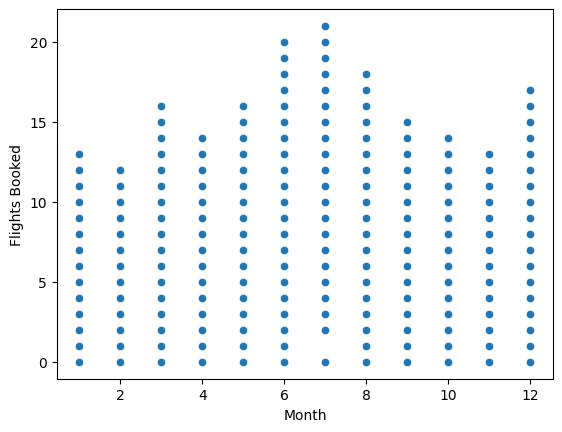

In [56]:
sns.scatterplot(x = "Month", y="Flights Booked", data = df_sin_dup);

Esto esta hecho para los dos años.

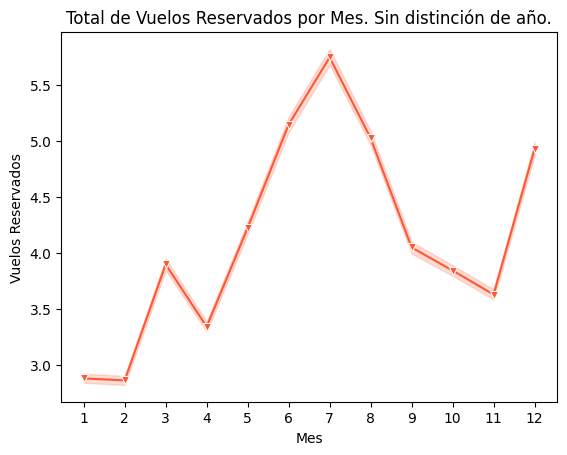

In [57]:
# Crear el connected scatterplot
sns.lineplot(x="Month", y="Flights Booked", data=df_sin_dup, marker="v", color='#FF5733')

# Configuración del gráfico
plt.title('Total de Vuelos Reservados por Mes. Sin distinción de año.')
plt.xlabel('Mes')
plt.ylabel('Vuelos Reservados')
plt.xticks(ticks=range(1, 13))  # Asegura que los meses del 1 al 12 estén representados
plt.show()

2.  . ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

In [58]:
df_sin_dup["Points Accumulated"].dtype

dtype('float64')

In [59]:
df_sin_dup["Distance"].dtype

dtype('int64')

In [60]:
# Calcular el coeficiente de correlación de Pearson entre Puntos Acumulados y Distancia
correlation = df_sin_dup['Points Accumulated'].corr(df_sin_dup['Distance'])
print(f'Coeficiente de correlación de Pearson: {correlation}')


Coeficiente de correlación de Pearson: 0.9945458005650525


Como el coeficiente de correlación de Pearson es cercano a +1 esto nos indica una relación positiva fuerte. Por lo que podríamos afirmar que existe relacion entre la distancia de los vuelos y los puntos acumulados.

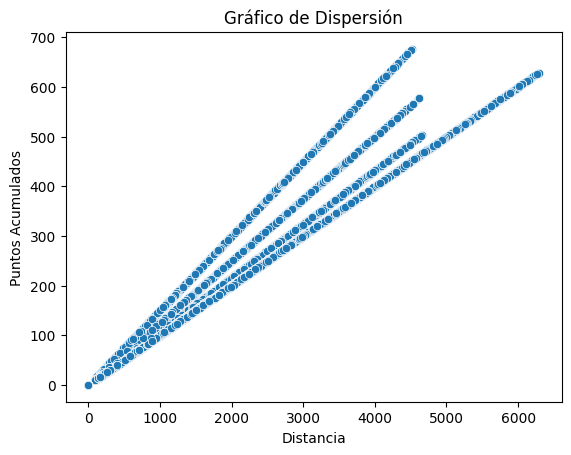

In [62]:
sns.scatterplot(x='Distance', y='Points Accumulated', data=df_sin_dup)
plt.title('Gráfico de Dispersión')
plt.xlabel('Distancia')
plt.ylabel('Puntos Acumulados')
plt.show()

3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [63]:
df_sin_dup["Province"].dtype

dtype('O')

In [64]:
df_sin_dup["Province"].value_counts()

Province
Ontario                 130258
British Columbia        106442
Quebec                   79573
Alberta                  23360
Manitoba                 15900
New Brunswick            15352
Nova Scotia              12507
Saskatchewan              9861
Newfoundland              6244
Yukon                     2679
Prince Edward Island      1584
Name: count, dtype: int64

/tmp/ipykernel_606/800209451.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= "Province", data = df_sin_dup,palette=["#4c72b0", "#55a868", "#f39c42", "#e64a4a", "#9a8c6b",


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Alberta'),
  Text(1, 0, 'Ontario'),
  Text(2, 0, 'British Columbia'),
  Text(3, 0, 'Saskatchewan'),
  Text(4, 0, 'Quebec'),
  Text(5, 0, 'Newfoundland'),
  Text(6, 0, 'Manitoba'),
  Text(7, 0, 'New Brunswick'),
  Text(8, 0, 'Nova Scotia'),
  Text(9, 0, 'Prince Edward Island'),
  Text(10, 0, 'Yukon')])

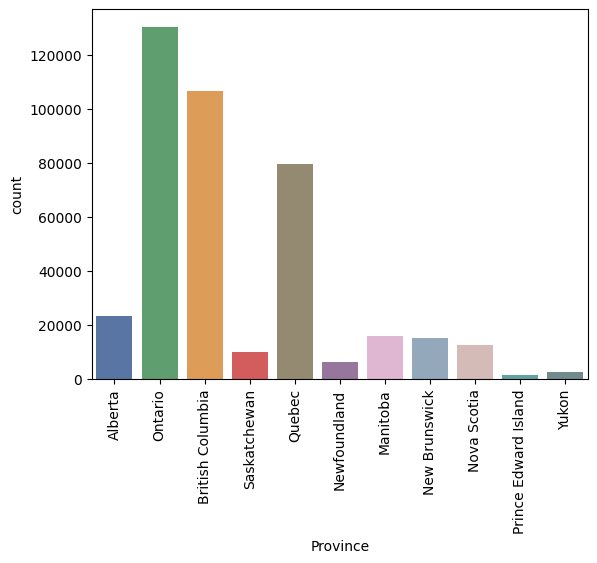

In [65]:
sns.countplot(x= "Province", data = df_sin_dup,palette=["#4c72b0", "#55a868", "#f39c42", "#e64a4a", "#9a8c6b", 
           "#9b6fa5", "#e6b0d4", "#8ca8c2", "#d9b8b2", "#57adad", 
           "#6c8f92"]);
plt.xticks(rotation = 90)

------------------------- PRUEBA MAPA -----------------------

In [ ]:
con geoplot

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [67]:
df_sin_dup["Salary"].dtype

dtype('float64')

In [68]:
df_sin_dup["Salary"].value_counts()

Salary
101933.0    552
51573.0     336
61809.0     336
62283.0     336
64001.0     312
           ... 
63076.0      24
61927.0      24
46749.0      24
73327.0      24
61434.0      24
Name: count, Length: 5890, dtype: int64

In [69]:
df_sin_dup["Education"].dtype

dtype('O')

In [70]:
df_sin_dup["Education"].value_counts()

Education
Bachelor                252567
College                 102260
High School or Below     18915
Doctor                   17731
Master                   12287
Name: count, dtype: int64

<Axes: xlabel='Salary', ylabel='Count'>

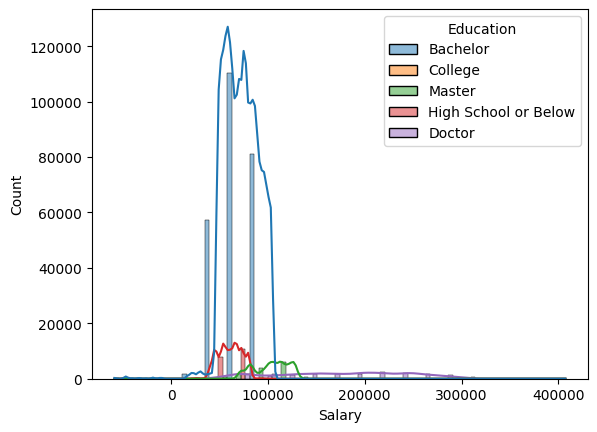

In [ ]:
#Relacion entre el salario y el nivel educativo con histograma
sns.histplot(data=df_sin_dup, x='Salary', hue='Education', kde=True, multiple='dodge', bins=20)

/tmp/ipykernel_606/3648270653.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sin_dup, x='Education', y='Salary', estimator='mean', palette=["#4c72b0", "#55a868", "#f39c42", "#e64a4a", "#9a8c6b"] )


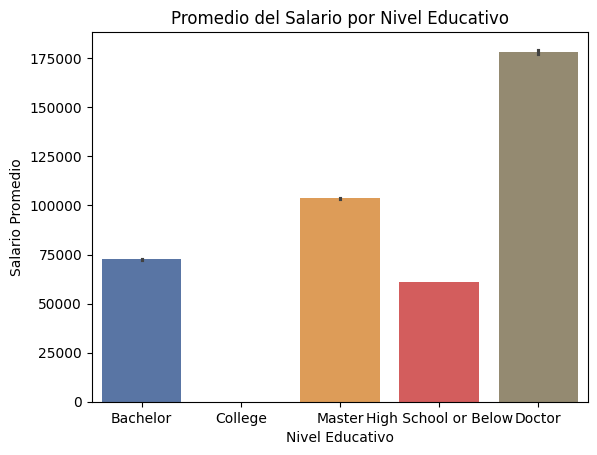

In [79]:
# Relación entre el salario (la media de este) y el nivel educativo
sns.barplot(data=df_sin_dup, x='Education', y='Salary', estimator='mean', palette=["#4c72b0", "#55a868", "#f39c42", "#e64a4a", "#9a8c6b"] )

# Añadir título y etiquetas
plt.title('Promedio del Salario por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')

# Mostrar el gráfico
plt.show()


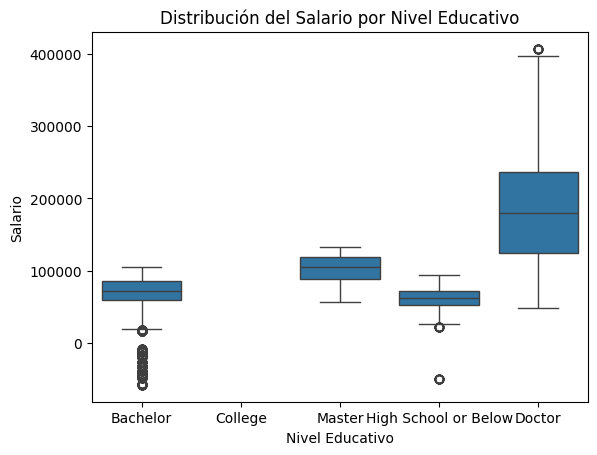

In [ ]:
# Comparativa entre los salarios y los niveles educativos. Ojo con los outliers de bachelor por debajo. 
sns.boxplot(data=df_sin_dup, x='Education', y='Salary')

# Añadir título y etiquetas
plt.title('Distribución del Salario por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario')

# Mostrar el gráfico
plt.show()


5.  . ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [80]:
df_sin_dup["Enrollment Type"].value_counts()

Enrollment Type
Standard          380419
2018 Promotion     23341
Name: count, dtype: int64

In [ ]:
c_c_t = df_sin_dup['Loyalty Card'].value_counts()

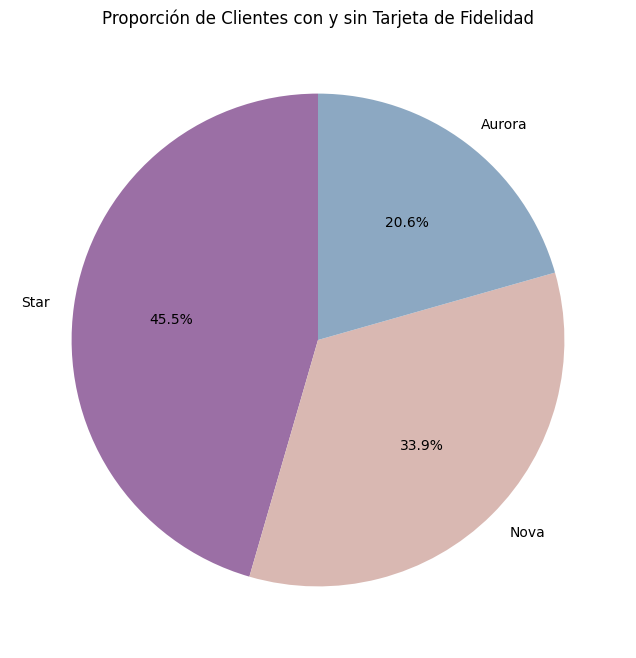

In [ ]:
# Crear el gráfico de pastel (pie chart)
plt.figure(figsize=(8, 8))  # Ajustar el tamaño de la figura
plt.pie(c_c_t, labels=c_c_t.index, autopct='%1.1f%%', colors=["#9b6fa5" , "#d9b8b2", "#8ca8c2"], startangle=90)
plt.title('Porcentaje de clientes con diferente tipo de Tarjeta de fidelidad')
plt.show()


In [87]:
c_c_t

Loyalty Card
Star      183745
Nova      136883
Aurora     83132
Name: count, dtype: int64

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

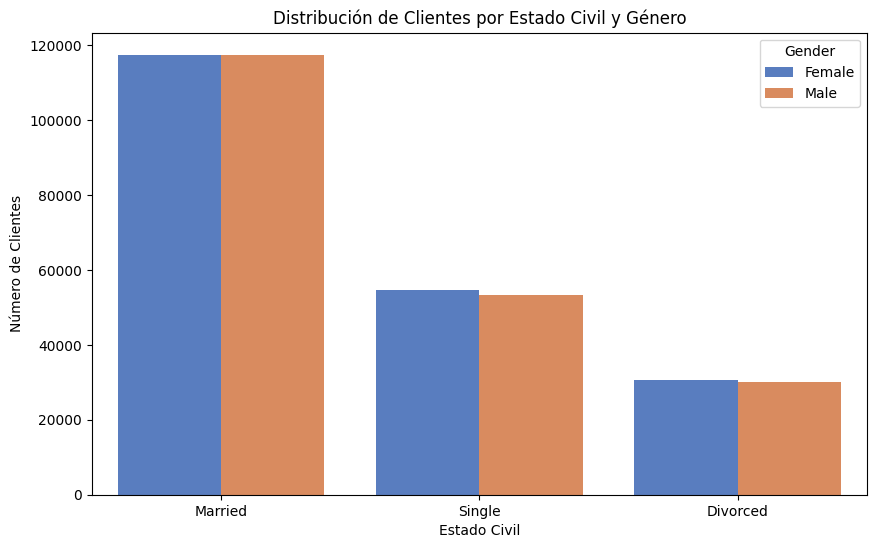

In [ ]:
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
sns.countplot(data=df_sin_dup, x='Marital Status', hue='Gender', palette='muted')
plt.title('Distribución de Clientes por Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
plt.show()


In [66]:
df_sin_dup.head(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
